# How has COVID-19 affected mobility of people and good across the globe?


### Preparation - Setting up environment and packages; data import

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install pyspark

     |████████████████████████████████| 204.2MB 61kB/s 
     |████████████████████████████████| 204kB 46.9MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=7cd83ff9786fb9c29dac5c87cf6e768584f5ae8f0938b14d415e8d04de437d19
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"

In [3]:
# Spark setup
import findspark
findspark.init("spark-3.0.1-bin-hadoop2.7")# SPARK_HOME

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline


In [5]:
!pip install PyDrive

In [6]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [7]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [8]:
#from google.colab import drive
#drive.mount('/content/drive')

In [9]:
urls = ["1H3bKORdFpmYRxaUX_SUVCUbrUNYSpINR",'1VAOES2v2NdaAzMF0uipVU_yMbAUYuONr', '1v91yXhrajRDewzg9HhinbkuNKy8LyMbt', '1WUqMEEdM9RowhN11iF0oYOvmh8zzU9os', '1b6QMl1mfbG6DGpihpudliJ9gB_hQKPkc', '1LbJKYh8pgTYPS2NTiC4AhzfXe8GKBbfr', '1_BSRy4qg_S3e0fOXtyZ8lBscDX_YegM6', '1t1xbKdkaCsDrnNH6wX-4Sdiw_MP-bxAu', '1gXHLTPSLLBvqdegMs-E0oFGGd8xbDE3f', '1uK5RR8K_mnllnIitsBKOKCyU1NtBaoIq', '1GB0GpRsSsdRSU2j11O620UECc49V4T0T', '1rFQFqm5d2hV2SmDFXThkDKwAhgtdFbwb']
names = ['mobility_report_all.csv', 'city_congestion.csv', 'comm_traffic_industry.csv', 'comm_traffic.csv', 'fuel_daily.csv', 'fuel_weekly.csv', 'geo_info.csv', 'lookup_region.csv', 'port_traffic.csv', 'us_airport.csv', 'us_border_vol.csv', 'us_border_waittime.csv']

for i in range(len(urls)):
  file = drive.CreateFile({'id':urls[i]})
  file.GetContentFile(names[i])
'''
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df3 = pd.read_csv('Filename.csv')
'''

"\ndownloaded = drive.CreateFile({'id':id}) \ndownloaded.GetContentFile('Filename.csv')  \ndf3 = pd.read_csv('Filename.csv')\n"

In [10]:
##creating pandas and spark df
mobility_report = pd.read_csv('mobility_report_all.csv')
mobility_report_spark = spark.read.format("csv").option("header", "true").load("mobility_report_all.csv")
mobility_report_spark.registerTempTable('mobility_report_sql')

city_congestion = pd.read_csv('city_congestion.csv')
city_congestion_spark = spark.read.format("csv").option("header", "true").load("city_congestion.csv")
city_congestion_spark.registerTempTable('city_congestion_sql')

comm_traffic_industry = pd.read_csv('comm_traffic_industry.csv')
comm_traffic_industry_spark = spark.read.format("csv").option("header", "true").load("comm_traffic_industry.csv")
comm_traffic_industry_spark.registerTempTable('comm_traffic_industry_sql')

comm_traffic = pd.read_csv('comm_traffic.csv')
comm_traffic_spark = spark.read.format("csv").option("header", "true").load("comm_traffic.csv")
comm_traffic_spark.registerTempTable('comm_traffic_sql')

fuel_daily = pd.read_csv('fuel_daily.csv')
fuel_daily_spark = spark.read.format("csv").option("header", "true").load("fuel_daily.csv")
fuel_daily_spark.registerTempTable('fuel_daily_sql')

fuel_weekly = pd.read_csv('fuel_weekly.csv')
fuel_weekly_spark = spark.read.format("csv").option("header", "true").load("fuel_weekly.csv")
fuel_weekly_spark.registerTempTable('fuel_weekly_sql')

geo_info = pd.read_csv('geo_info.csv')
geo_info_spark = spark.read.format("csv").option("header", "true").load("geo_info.csv")
geo_info_spark.registerTempTable('geo_info_sql')

lookup_region = pd.read_csv('lookup_region.csv')
lookup_region_spark = spark.read.format("csv").option("header", "true").load("lookup_region.csv")
lookup_region_spark.registerTempTable('lookup_region_sql')

port_traffic = pd.read_csv('port_traffic.csv')
port_traffic_spark = spark.read.format("csv").option("header", "true").load("port_traffic.csv")
port_traffic_spark.registerTempTable('port_traffic_sql')

us_airport = pd.read_csv('us_airport.csv')
us_airport_spark = spark.read.format("csv").option("header", "true").load("us_airport.csv")
us_airport_spark.registerTempTable('us_airport_sql')

us_border_vol = pd.read_csv('us_border_vol.csv')
us_border_vol_spark = spark.read.format("csv").option("header", "true").load("us_border_vol.csv")
us_border_vol_spark.registerTempTable('us_border_vol_sql')

us_border_waittime = pd.read_csv('us_border_waittime.csv')
us_border_waittime_spark = spark.read.format("csv").option("header", "true").load("us_border_waittime.csv")
us_border_waittime_spark.registerTempTable('us_border_waittime_sql')



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
test = spark.sql('select * from us_border_waittime_sql')
test.show(50)

+---------+-----------+-------------------+--------------+----------+----------+--------+----------+--------+---------------------+------------------+-------------------------------+--------------------+-------------+--------------------+-------------+---------------+----------------+--------------+-------+
|border_id|  port_name|       port_name_us|trip_direction|hour_local|date_local|day_type|  date_utc|hour_utc|avg_crossing_duration|aggregation_method|percent_of_baseline_trip_volume|         border_zone|province_code|      border_zone_us|state_code_us|border_latitude|border_longitude|border_geohash|version|
+---------+-----------+-------------------+--------------+----------+----------+--------+----------+--------+---------------------+------------------+-------------------------------+--------------------+-------------+--------------------+-------------+---------------+----------------+--------------+-------+
|     MX-9|     Tecate|             Tecate|  Mexico to US|        12|2020

#mobility report


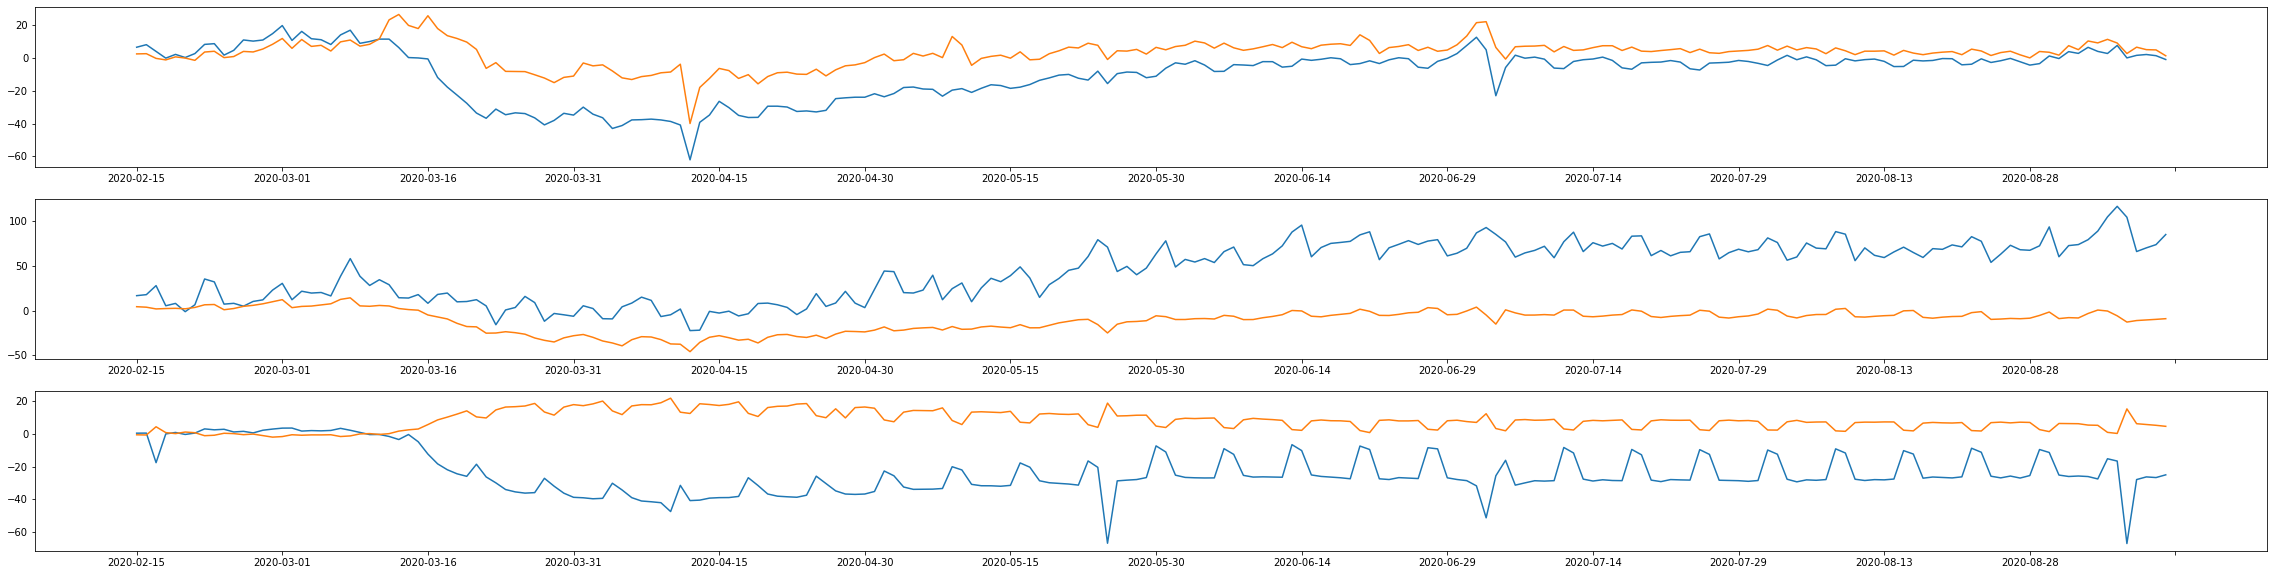

"\nax1 = fig.add_subplot(312)\nax1.plot(joined_pd['date'], joined_pd['percent_of_normal_volume'])\nax1.xaxis.set_major_locator(plt.MaxNLocator(20))\n\nax2 = fig.add_subplot(313)\nax2.plot(joined_pd['date'],joined_pd['percent_of_normal_volume_truck'])\nax2.xaxis.set_major_locator(plt.MaxNLocator(20))\nplt.show()\n"

In [12]:
import matplotlib.pyplot as plt
#spark.conf.set("spark.sql.execution.arrow.enabled", "true")
#joined_pd = joined.select("*").toPandas()
us = spark.sql('select date, avg(retail_and_recreation_percent_change_from_baseline) as retail_and_recreation_change, avg(grocery_and_pharmacy_percent_change_from_baseline) as grocery_and_pharmacy_percent_change, avg(parks_percent_change_from_baseline) as parks_percent_change, avg(transit_stations_percent_change_from_baseline) transit_stations_percent_change, avg(workplaces_percent_change_from_baseline) workplaces_percent_change, avg(residential_percent_change_from_baseline) as residential_percent_change from mobility_report_sql where country_region_code = "US" group by date order by date')
us_pd = us.select("*").toPandas()
fig = plt.figure(figsize=(40,10))
ax0 = fig.add_subplot(311)
ax0.plot(us_pd['date'], us_pd['retail_and_recreation_change'])
ax0.plot(us_pd['date'], us_pd['grocery_and_pharmacy_percent_change'])
ax1 = fig.add_subplot(312)
ax2 = fig.add_subplot(313)
ax1.plot(us_pd['date'], us_pd['parks_percent_change'])
ax1.plot(us_pd['date'], us_pd['transit_stations_percent_change'])
ax2.plot(us_pd['date'], us_pd['workplaces_percent_change'])
ax2.plot(us_pd['date'], us_pd['residential_percent_change'])

ax0.xaxis.set_major_locator(plt.MaxNLocator(20))
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
ax2.xaxis.set_major_locator(plt.MaxNLocator(20))

plt.show()



'''
ax1 = fig.add_subplot(312)
ax1.plot(joined_pd['date'], joined_pd['percent_of_normal_volume'])
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))

ax2 = fig.add_subplot(313)
ax2.plot(joined_pd['date'],joined_pd['percent_of_normal_volume_truck'])
ax2.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.show()
'''

In [20]:
#join us with geo_info_us
geo_us = geo_info[(geo_info['geo_id'] == 'US')]
geo_us_spark = spark.createDataFrame(geo_us)
geo_us_spark.registerTempTable('geo_us_sql')
us.registerTempTable('us')
mobility_joined = spark.sql('select * from us a join geo_us_sql b on a.date = b.date')
mobility_joined.show()
mobility_joined_pd = mobility_joined

+----------+----------------------------+-----------------------------------+--------------------+-------------------------------+-------------------------+--------------------------+----------+---+-----+----+---------------------+------------+---------------+------+-------------------------+------+----------------------+-------------+
|      date|retail_and_recreation_change|grocery_and_pharmacy_percent_change|parks_percent_change|transit_stations_percent_change|workplaces_percent_change|residential_percent_change|      date|day|month|year|daily_confirmed_cases|daily_deaths|confirmed_cases|deaths|countries_and_territories|geo_id|country_territory_code|pop_data_2019|
+----------+----------------------------+-----------------------------------+--------------------+-------------------------------+-------------------------+--------------------------+----------+---+-----+----+---------------------+------------+---------------+------+-------------------------+------+----------------------+-

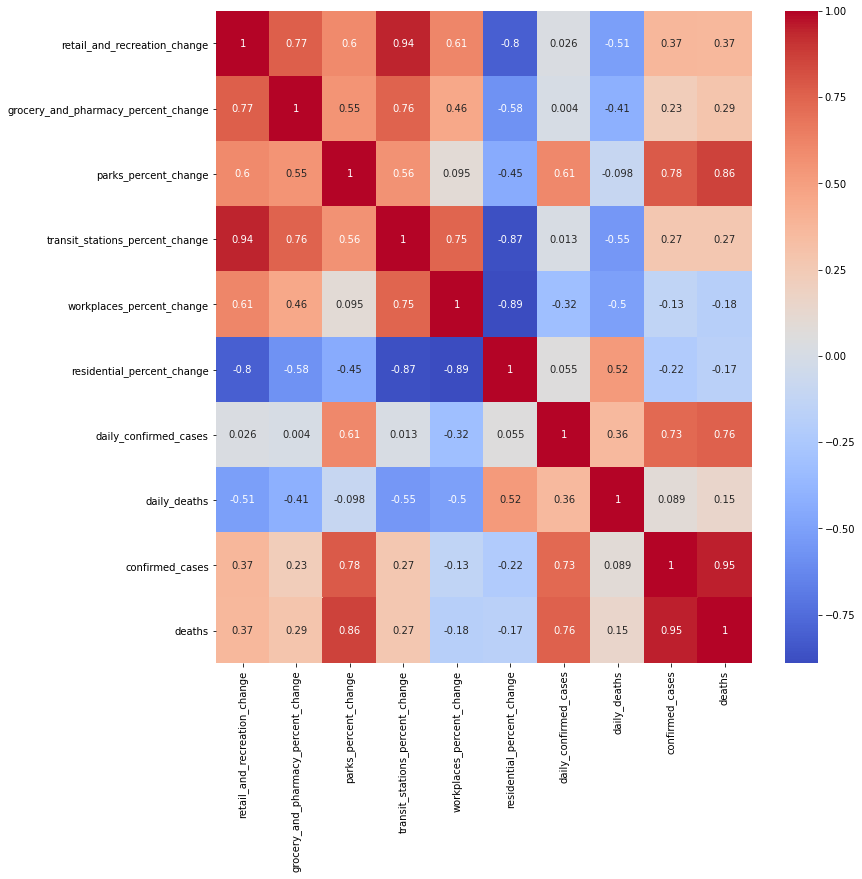

In [21]:
#correlatino of geo_info_us
mobility_joined_pd = mobility_joined.select("*").toPandas()
mobility_joined_pd_clean = mobility_joined_pd.drop(columns=['day', 'month', 'year', 'countries_and_territories', 'geo_id', 'country_territory_code', 'pop_data_2019'])
mobility_corr = mobility_joined_pd_clean.corr(method='pearson')
import seaborn as sns
from matplotlib import pyplot
pyplot.figure(figsize=(12, 12))
sns.heatmap(mobility_corr, annot = True, fmt='.2g',cmap= 'coolwarm')

In [22]:
mobility_df = mobility_joined_pd_clean.drop(columns=['date', 'retail_and_recreation_change', 'grocery_and_pharmacy_percent_change', 'parks_percent_change', 'transit_stations_percent_change', 'workplaces_percent_change'])

mobility_df.head()


,residential_percent_change,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths
0,-0.471980,0,0,53,0
1,18.423622,27620,1500,557571,22108
2,7.933287,34720,826,2347022,121228
3,8.606360,22302,712,1942363,110514
4,12.488959,28391,1831,529951,20608


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
labels = np.array(mobility_df['residential_percent_change'])
mobility_df = mobility_df.drop(columns=['residential_percent_change'])
feature_list = list(mobility_df.columns)
mobility_features = np.array(mobility_df)
train_features, test_features, train_labels, test_labels = train_test_split(mobility_features, labels, test_size = 0.2, random_state = 40)

In [36]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (168, 4)
Training Labels Shape: (168,)
Testing Features Shape: (42, 4)
Testing Labels Shape: (42,)


In [37]:
train_features, test_features, train_labels, test_labels = train_test_split(mobility_features, labels, test_size = 0.2, random_state = 40)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 40)
rf.fit(m_train_features, m_train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=40, verbose=0, warm_start=False)

In [38]:
###first model performance
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.45 degrees.
Accuracy: 75.33 %.


In [39]:
from sklearn.metrics import r2_score

r2_score(test_labels, predictions)

0.595837491077156

In [40]:
#use grid search to improve model performance
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose =2, random_state=40)
rf_random.fit(train_features, train_labels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.5s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  9.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=1000,
                             

In [41]:
rf = RandomForestRegressor(n_estimators = 1600, min_samples_split = 5, min_samples_leaf = 4, max_depth=110, bootstrap=True)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
r2_score(test_labels, predictions)

0.5830338796159249

In [42]:
predictions

array([13.47408033,  5.48636695, -0.68597146,  4.10609191, -0.07999124,
       12.63030031, -0.62473475,  5.07122801, 15.19457893,  4.46833331,
        5.6169616 , 14.31361711,  5.56175589,  5.92442343,  8.58803725,
       15.31994391, -0.38925263,  4.87794431,  6.90896577,  5.57399296,
        6.37159647,  8.4961296 , 14.61591532,  4.69615214,  5.38110031,
       15.70063501,  9.22057593, -0.28458689, 10.65161299,  7.65360371,
        1.22046841, -0.70753945, 17.38433909,  8.65093994,  4.49209258,
        6.36026115,  5.34229465,  6.42096409,  4.69873006,  6.8370829 ,
        8.04604839, 12.39089744])

In [43]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
  
    return accuracy
  
best_random = rf_random.best_estimator_
random_accuracy = evaluate(rf, test_features, test_labels)

Model Performance
Average Error: 2.5743 degrees.
Accuracy = 68.96%.


In [44]:
print(test_features)

[[  33955    2062 1103781   65068]
 [  34339     751 2381361  121979]
 [     18       0      53       0]
 [    887      16    4661      85]
 [     95       3     433      17]
 [  21236    1080 1622670   97087]
 [      3       1      69       1]
 [  29909     678 2220961  119112]
 [  18360     318  143025    2509]
 [  45909    1110 5867785  180824]
 [  58407    1133 4620444  154447]
 [  23841    2144 1204475   71078]
 [  64838    1336 5313080  168446]
 [  67717     953 3499291  137419]
 [  19699     994 1851520  107175]
 [  28819     915  245540    6053]
 [     74       1     233      12]
 [  42848    1228 5821876  179714]
 [  55941    1490 5197148  166027]
 [  45607     543 4713562  155403]
 [  57525    1403 4771087  156806]
 [  21086     764 1811277  105147]
 [  21352    1054  890524   51017]
 [  53399     678 2739879  128740]
 [  38119    1207 5779028  178486]
 [  24998     909  189618    4079]
 [  25434    1263 1577287   94702]
 [    105       2     338      14]
 [  25508    1662 14

In [45]:
####XGBoost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
data_dmatrix = xgb.DMatrix(data=mobility_df,label=labels)
x_train, x_test, y_train, y_test = train_test_split(mobility_features, labels, test_size = 0.2, random_state = 123)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(x_train, y_train)
preds = xg_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[18:12:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 4.107299


In [46]:
#grid search to optimize hyper-parameters
params = {
        'min_child_weight': [0.5, 1, 2, 3, 5],
        'gamma': [1.5, 2, 2.5, 3, 3.5],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
        'max_depth': [2, 3, 4, 5]
        }
random_search = RandomizedSearchCV(xg_reg, param_distributions=params, n_iter=5, scoring='r2', n_jobs=4, cv=5, verbose=3, random_state=123)
random_search.fit(x_train, y_train)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[18:12:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    2.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(alpha=10, base_score=0.5,
                                          booster='gbtree', colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.3, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=5, min_child_weight=1,
                                          missing=None, n_estimators=10,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0,...
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                 

In [47]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 0.7, 'min_child_weight': 2, 'max_depth': 3, 'gamma': 2.5, 'colsample_bytree': 0.9}


In [49]:
preds = random_search.best_estimator_.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
preds = random_search.best_estimator_.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
evaluate(random_search.best_estimator_,x_test,y_test)

RMSE: 4.068333
RMSE: 4.068333
Model Performance
Average Error: 3.2740 degrees.
Accuracy = 109.32%.


109.31667865633229

In [50]:
evaluate(random_search.best_estimator_,x_test,y_test)

Model Performance
Average Error: 3.2740 degrees.
Accuracy = 109.32%.


109.31667865633229

## Fuel


In [52]:
#join fuel with geo_info_us
fuel_daily_spark.registerTempTable('fuel_daily_sql')
fuel_daily_total = spark.sql('select date, AVG(percent_of_normal_volume) as average_percent_of_normal_fuel_volume from fuel_daily_sql group by date')
fuel_daily_total.registerTempTable('fuel_daily_total_sql')
geo_us = geo_info[(geo_info['geo_id'] == 'US')]
geo_us_spark = spark.createDataFrame(geo_us)
geo_us_spark.registerTempTable('geo_us_sql')
us.registerTempTable('us')
fuel_joined = spark.sql('select * from fuel_daily_total_sql a join geo_us_sql b on a.date = b.date')
fuel_joined.show()

+----------+-------------------------------------+----------+---+-----+----+---------------------+------------+---------------+------+-------------------------+------+----------------------+-------------+
|      date|average_percent_of_normal_fuel_volume|      date|day|month|year|daily_confirmed_cases|daily_deaths|confirmed_cases|deaths|countries_and_territories|geo_id|country_territory_code|pop_data_2019|
+----------+-------------------------------------+----------+---+-----+----+---------------------+------------+---------------+------+-------------------------+------+----------------------+-------------+
|2020-03-13|                              103.615|2020-03-13| 13|    3|2020|                  351|          10|           1663|    40|     United_States_of_...|    US|                   USA| 3.29064917E8|
|2020-03-14|                    97.08833333333332|2020-03-14| 14|    3|2020|                  511|           7|           2174|    47|     United_States_of_...|    US|             

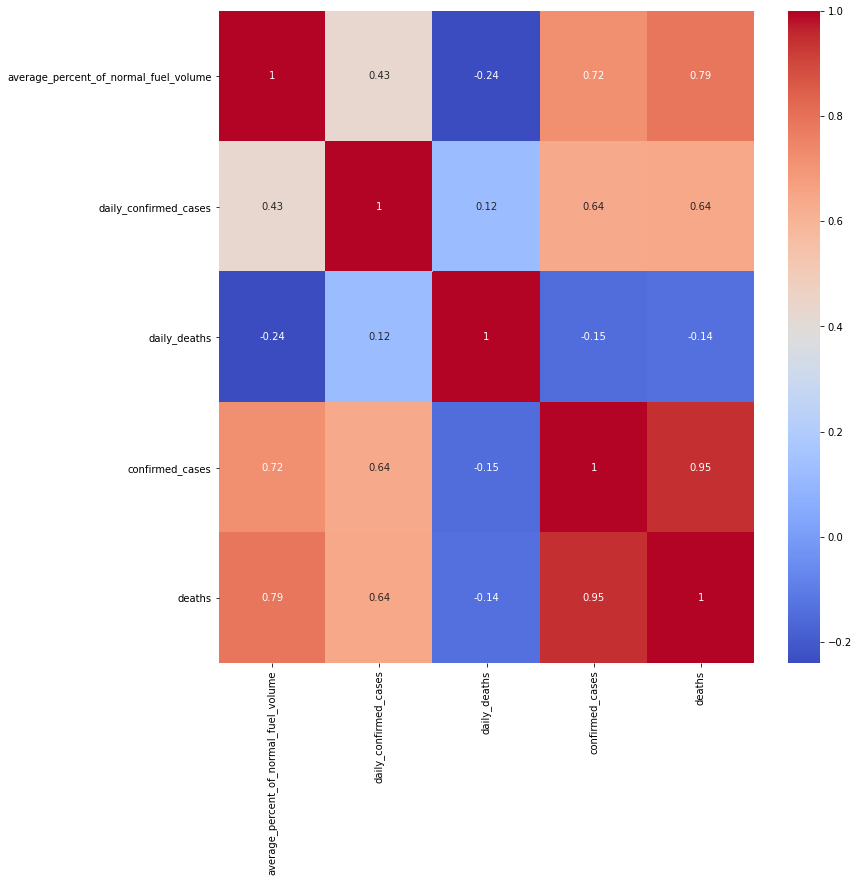

In [53]:
#correlatino of geo_info_us
fuel_joined_pd = fuel_joined.select("*").toPandas()
fuel_joined_pd_cleaned = fuel_joined_pd.drop(columns=['day', 'month', 'year', 'countries_and_territories', 'geo_id', 'country_territory_code', 'pop_data_2019'])
fuel_corr = fuel_joined_pd_cleaned.corr(method='pearson')
import seaborn as sns
from matplotlib import pyplot
pyplot.figure(figsize=(12, 12))
sns.heatmap(fuel_corr, annot = True, fmt='.2g',cmap= 'coolwarm')

In [54]:
fuel_df = fuel_joined_pd_cleaned.drop(columns=['date'])
fuel_df.head()

,average_percent_of_normal_fuel_volume,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths
0,103.615000,351,10,1663,40
1,97.088333,511,7,2174,47
2,98.465000,777,10,2951,57
3,89.380000,823,12,3774,69
4,85.275000,887,16,4661,85


In [55]:
labels = np.array(fuel_df['average_percent_of_normal_fuel_volume'])
fuel_df = fuel_df.drop(columns=['average_percent_of_normal_fuel_volume'])
feature_list = list(fuel_df.columns)
fuel_features = np.array(fuel_df)
f_train_features, f_test_features, f_train_labels, f_test_labels = train_test_split(fuel_features, labels, test_size = 0.2, random_state = 40)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 40)
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=40, verbose=0, warm_start=False)

In [56]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 40)
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=40, verbose=0, warm_start=False)

In [57]:
###first model performance
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.45 degrees.
Accuracy: 75.33 %.


In [58]:

r2_score(test_labels, predictions)

0.595837491077156

In [59]:
#use grid search to improve model performance
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose =2, random_state=40)
rf_random.fit(train_features, train_labels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.5s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  9.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=1000,
                             

In [60]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
  
    return accuracy
  
best_random = rf_random.best_estimator_
random_accuracy = evaluate(rf, test_features, test_labels)

Model Performance
Average Error: 2.4468 degrees.
Accuracy = 75.33%.


In [61]:
####XGBoost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
data_dmatrix = xgb.DMatrix(data=fuel_df,label=labels)
x_train, x_test, y_train, y_test = train_test_split(fuel_df, labels, test_size = 0.2, random_state = 123)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(x_train, y_train)
preds = xg_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[18:22:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 36.520228


In [62]:
#grid search to optimize hyper-parameters
params = {
        'min_child_weight': [0.5, 1, 2, 3, 5],
        'gamma': [1.5, 2, 2.5, 3, 3.5],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
        'max_depth': [2, 3, 4, 5]
        }
random_search = RandomizedSearchCV(xg_reg, param_distributions=params, n_iter=5, scoring='r2', n_jobs=4, cv=5, verbose=3, random_state=123)
random_search.fit(x_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[18:22:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    2.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(alpha=10, base_score=0.5,
                                          booster='gbtree', colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.3, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=5, min_child_weight=1,
                                          missing=None, n_estimators=10,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0,...
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                 

In [63]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 0.8, 'min_child_weight': 2, 'max_depth': 2, 'gamma': 3.5, 'colsample_bytree': 0.9}


In [64]:
preds = random_search.best_estimator_.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
evaluate(random_search.best_estimator_,x_test,y_test)

RMSE: 36.486786
Model Performance
Average Error: 35.5020 degrees.
Accuracy = 64.28%.


64.27935047066009

# make prediction

In [66]:
geo_us = geo_info[(geo_info['geo_id'] == 'US')]
geo_us_spark = spark.createDataFrame(geo_us)
geo_us_spark.registerTempTable('geo_us_sql')

In [67]:
all = spark.sql('select * from geo_us_sql order by date desc')
all.show()


+----------+---+-----+----+---------------------+------------+---------------+------+-------------------------+------+----------------------+-------------+
|      date|day|month|year|daily_confirmed_cases|daily_deaths|confirmed_cases|deaths|countries_and_territories|geo_id|country_territory_code|pop_data_2019|
+----------+---+-----+----+---------------------+------------+---------------+------+-------------------------+------+----------------------+-------------+
|2020-09-18| 18|    9|2020|                43567|         831|        6674458|197633|     United_States_of_...|    US|                   USA| 3.29064917E8|
|2020-09-17| 17|    9|2020|                24598|         865|        6630891|196802|     United_States_of_...|    US|                   USA| 3.29064917E8|
|2020-09-16| 16|    9|2020|                51473|        1407|        6606293|195937|     United_States_of_...|    US|                   USA| 3.29064917E8|
|2020-09-15| 15|    9|2020|                34841|         451|  

In [68]:
'''
labels = np.array(fuel_df['average_percent_of_normal_fuel_volume'])
fuel_df = fuel_df.drop(columns=['average_percent_of_normal_fuel_volume'])
feature_list = list(fuel_df.columns)
fuel_features = np.array(fuel_df)
f_train_features, f_test_features, f_train_labels, f_test_labels = train_test_split(fuel_features, labels, test_size = 0.2, random_state = 40)
'''
rf_f = RandomForestRegressor(n_estimators = 1600, max_features= 'sqrt',random_state = 40)
rf_f.fit(f_train_features, f_train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1600, n_jobs=None, oob_score=False,
                      random_state=40, verbose=0, warm_start=False)

In [70]:
pred = rf_f.predict(test_features)
pred

array([ 89.33145521, 102.76763854, 100.72476979,  88.11441562,
       100.72476979,  85.22831979, 100.72476979, 101.76877604,
        73.23292604, 107.30254062, 105.52436354,  90.66238125,
       110.20164375, 102.06532292,  99.95755625,  69.98940208,
       100.72476979, 108.29597292, 108.72497083, 101.2804875 ,
       104.72713542,  99.69584792,  78.44280417,  87.28990104,
       108.86910937,  70.97888646,  94.90128125, 100.72476979,
        94.76613021, 101.04285417,  91.53314167, 100.72476979,
        67.27831979,  99.01035208, 109.98803958,  66.48928229,
       102.2725625 , 104.85944063, 111.17459896,  95.85278333,
        99.73368229,  91.36206667])

In [71]:
#m_train_features, m_test_features, m_train_labels, m_test_labels = train_test_split(mobility_features, labels, test_size = 0.2, random_state = 40)
rf_m = RandomForestRegressor(n_estimators = 1600, min_samples_split = 5, min_samples_leaf = 4, max_depth=110, bootstrap=True)
rf_m.fit(m_train_features, m_train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=110, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [74]:
pred_m = rf_m.predict(test_features)
pred_m

array([13.66801299,  5.5028725 , -0.69976781,  4.04415969, -0.10683419,
       12.60466991, -0.59407171,  5.05669761, 15.23344714,  4.51158147,
        5.61031419, 14.35413436,  5.47918615,  5.91663745,  8.62868256,
       15.41407832, -0.3963507 ,  4.85791756,  6.90755861,  5.62529268,
        6.28786479,  8.46992342, 14.5630183 ,  4.66371689,  5.33392993,
       15.83535056,  9.20903652, -0.29998532, 10.79355528,  7.70659294,
        1.22485175, -0.70298231, 17.47061551,  8.66652767,  4.45443295,
        6.35194617,  5.37762578,  6.44195928,  4.7769667 ,  6.84394847,
        8.06426138, 12.38438825])

In [75]:
predict_features = m_test_features[:2]
predict_features = [[51473*1.36, 1407*1.36, 9000000, 195937*1.36]
                    ,[62282.33, 1702.47, 8000000, 195937*1.21]
                    ,[54540.27607, 1490.84, 7000000, 207612.88]
                    ,[51473, 1407, 6606293, 195937]]
predict_features

[[70003.28, 1913.5200000000002, 9000000, 266474.32],
 [62282.33, 1702.47, 8000000, 237083.77],
 [54540.27607, 1490.84, 7000000, 207612.88],
 [51473, 1407, 6606293, 195937]]

In [76]:
print(type(test_features))

<class 'numpy.ndarray'>


In [77]:
rf_fuel = RandomForestRegressor(n_estimators = 1000, random_state = 40)

# Data Exploration

In [78]:
geo_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43509 entries, 0 to 43508
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       43509 non-null  object 
 1   day                        43509 non-null  int64  
 2   month                      43509 non-null  int64  
 3   year                       43509 non-null  int64  
 4   daily_confirmed_cases      43509 non-null  int64  
 5   daily_deaths               43509 non-null  int64  
 6   confirmed_cases            43509 non-null  int64  
 7   deaths                     43509 non-null  int64  
 8   countries_and_territories  43509 non-null  object 
 9   geo_id                     43321 non-null  object 
 10  country_territory_code     43445 non-null  object 
 11  pop_data_2019              43445 non-null  float64
dtypes: float64(1), int64(7), object(4)
memory usage: 4.0+ MB


In [79]:
test = geo_info[(geo_info['geo_id'] == 'US') & (geo_info['date'] < '2020-03-20') & (geo_info['confirmed_cases'] > 400) ]
test.head(50)
#03/11/2020

,date,day,month,year,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,countries_and_territories,geo_id,country_territory_code,pop_data_2019
40861,2020-03-08,8,3,2020,95,3,433,17,United_States_of_America,US,USA,329064917.0
40862,2020-03-09,9,3,2020,121,4,554,21,United_States_of_America,US,USA,329064917.0
40863,2020-03-10,10,3,2020,200,5,754,26,United_States_of_America,US,USA,329064917.0
40864,2020-03-11,11,3,2020,271,2,1025,28,United_States_of_America,US,USA,329064917.0
40865,2020-03-12,12,3,2020,287,2,1312,30,United_States_of_America,US,USA,329064917.0
40866,2020-03-13,13,3,2020,351,10,1663,40,United_States_of_America,US,USA,329064917.0
40867,2020-03-14,14,3,2020,511,7,2174,47,United_States_of_America,US,USA,329064917.0
40868,2020-03-15,15,3,2020,777,10,2951,57,United_States_of_America,US,USA,329064917.0
40869,2020-03-16,16,3,2020,823,12,3774,69,United_States_of_America,US,USA,329064917.0
40870,2020-03-17,17,3,2020,887,16,4661,85,United_States_of_America,US,USA,329064917.0


In [80]:
#filter geo_info by date and countey == 'US'
geo_info_us = geo_info[(geo_info['geo_id'] == 'US') & (geo_info['date'] >= '2020-03-10') & (geo_info['date'] <= '2020-09-16')]
geo_info_us_spark = spark.createDataFrame(geo_info_us)
#geo_info_us_spark.createTempView('geo_info_us_sql')
#creating spark sql for join
fuel_daily_spark.registerTempTable('fuel_daily_sql')
fuel_daily_total = spark.sql('select date, AVG(percent_of_normal_volume) as average_percent_of_normal_fuel_volume from fuel_daily_sql group by date')
fuel_daily_total.registerTempTable('fuel_daily_total_sql')

us_border_vol_spark.registerTempTable('us_border_vol_sql')
border_vol_total = spark.sql('select date, trip_direction, percent_of_normal_volume, percent_of_normal_volume_truck from us_border_vol_sql')
border_vol_total.registerTempTable('border_vol_total_sql')


joined = spark.sql('SELECT a.date, a.daily_confirmed_cases, a.confirmed_cases, a.deaths, \
                    b.average_percent_of_normal_fuel_volume, \
                    c.trip_direction, c.percent_of_normal_volume, c.percent_of_normal_volume_truck \
                    from geo_info_us_sql a \
                    join fuel_daily_total_sql b on a.date = b.date \
                    join border_vol_total_sql c on a.date = c.date')
joined.show()

AnalysisException: ignored

In [ ]:
joined_pd.to_csv('joined.csv')

In [ ]:
correlation = joined_pd.corr(method='pearson')
import seaborn as sns
from matplotlib import pyplot
#pyplot.figure(figsize=(10, 16))
sns.heatmap(correlation, annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
import matplotlib.pyplot as plt
#spark.conf.set("spark.sql.execution.arrow.enabled", "true")
#joined_pd = joined.select("*").toPandas()
fig = plt.figure(figsize=(40,10))
ax0 = fig.add_subplot(311)
ax0.plot(joined_pd['date'], joined_pd['average_percent_of_normal_fuel_volume'])

ax0.xaxis.set_major_locator(plt.MaxNLocator(20))
ax1 = fig.add_subplot(312)
ax1.plot(joined_pd['date'], joined_pd['percent_of_normal_volume'])
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))

ax2 = fig.add_subplot(313)
ax2.plot(joined_pd['date'],joined_pd['percent_of_normal_volume_truck'])
ax2.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.show()

#go back to february if possible? summary average by month, choose

In [ ]:
#list of datasets
'''
mobility_report_all
city_congestion
comm_traffic_industry
comm_traffic
fuel_daily
fuel_weekly
geo_info
lookup_region
port_traffic
us_airport
us_border_vol
us_border_waittime
'''

In [ ]:
#historical trend
historical = spark.sql('select date, AVG(retail_and_recreation_percent_change_from_baseline) as retail_recreation_change,   AVG(grocery_and_pharmacy_percent_change_from_baseline) as grocery_pharmacy_change, AVG(parks_percent_change_from_baseline) as parks_change, \
                        AVG(transit_stations_percent_change_from_baseline) as transit_stations_change, AVG(workplaces_percent_change_from_baseline) as workplace_change, AVG(residential_percent_change_from_baseline) as residential_change \
                         from mobility_report_sql \
                         GROUP BY date order by date asc'
                       )
historical.show(100)

In [ ]:
# number of country region
country_region = spark.sql('select distinct country_region from mobility_report_sql')
country_region.show(50)